# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

## Задачи
Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')

Для начала взглянем на данные с разных сторон:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Общая информация

В таблице 22 столбца:

* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — общая площадь квартиры (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)


In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


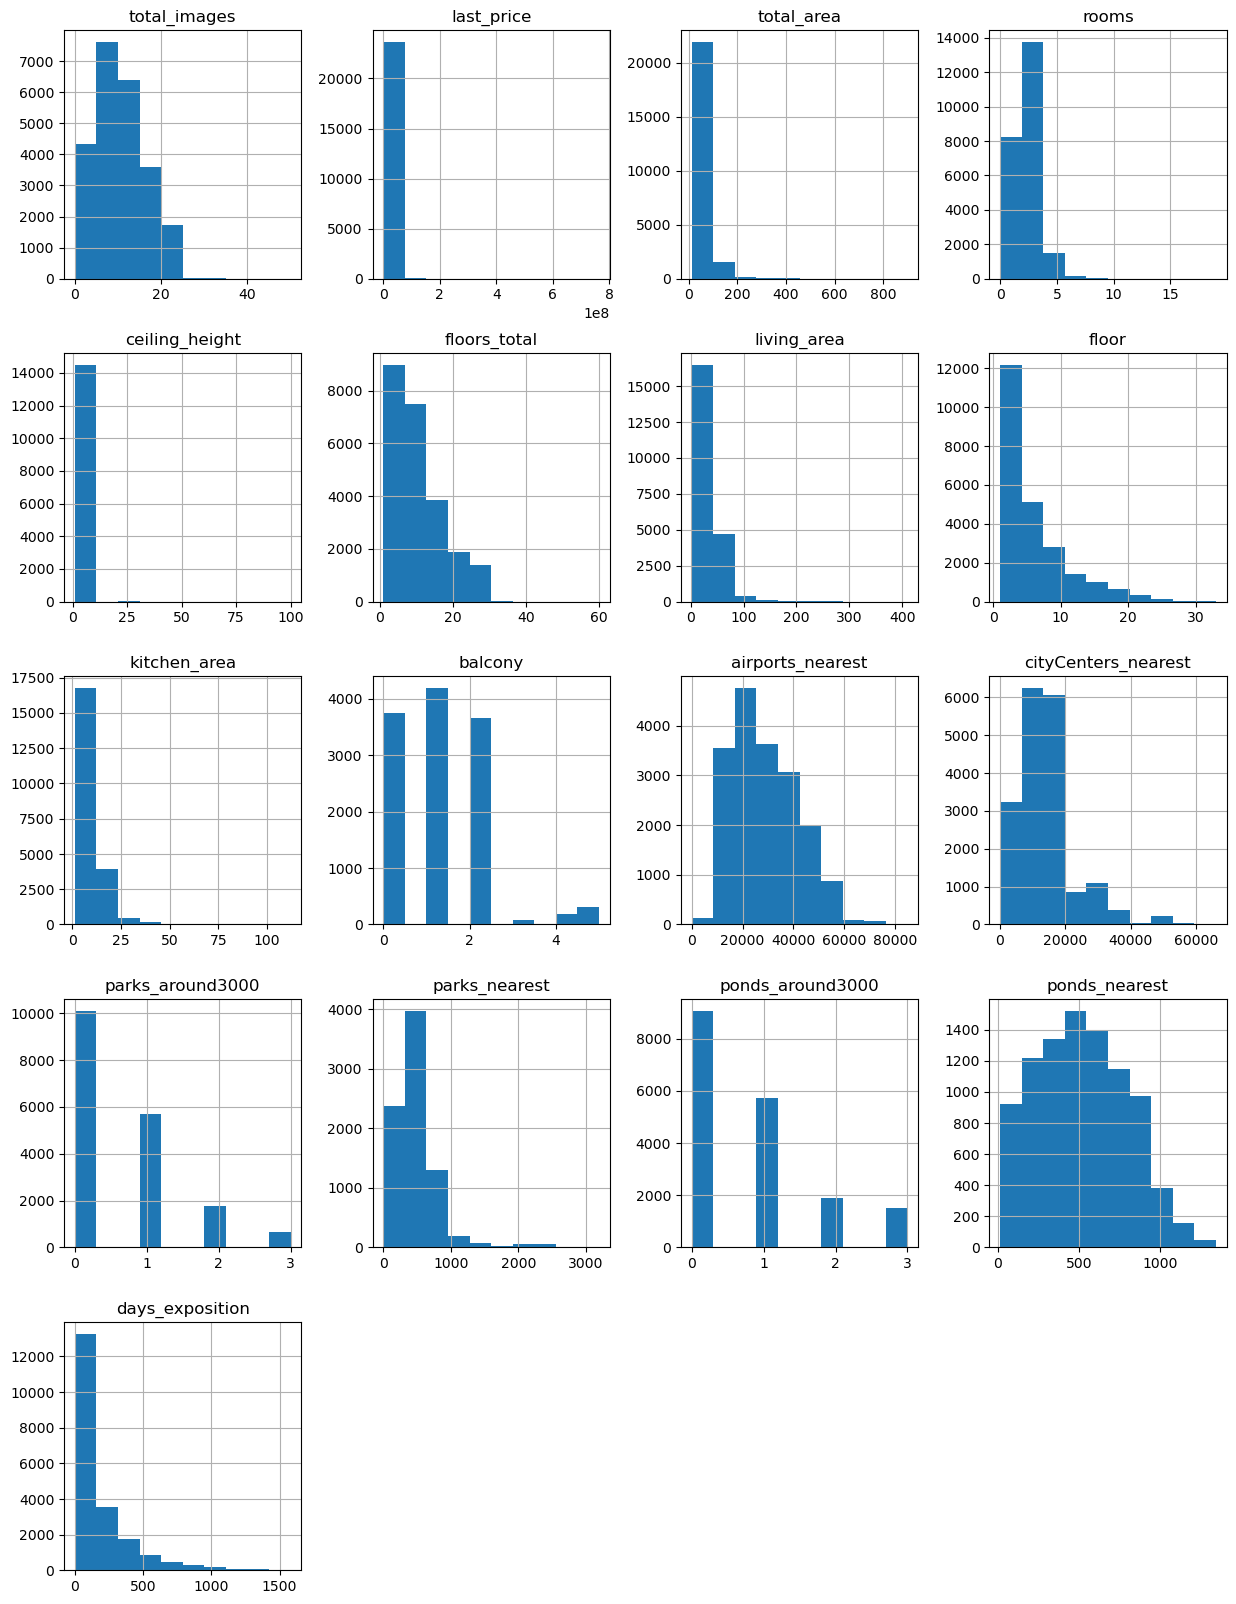

In [5]:
# Гистограммы для числовых столбцов
data.hist(figsize=(15, 20))
plt.show()

#### Первые наблюдения
Данные в датасете понятно структурированы, но есть столбцы с пропусками и несоответствием типов описываемых значений.

## Предобработка данных

### Обработка пропущенных значений
Пропуски: 
* `ceiling_height`
* `living_area`
* `floors_total`
* `kitchen_area`
* `locality_name`
* `airport_nearest`
* `cityCenters_nearest`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `days_exposition`

Пропуски и несоответствие типов:
* `ìs_appartment`
* `balcony`

Несоответствие типов:
* `first_day_exposition`

Взглянем на данные в столбце `ceiling_height` с помощью гистограммы. Отсавим только адекватыне значения с высотой потолков до 4 метров.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

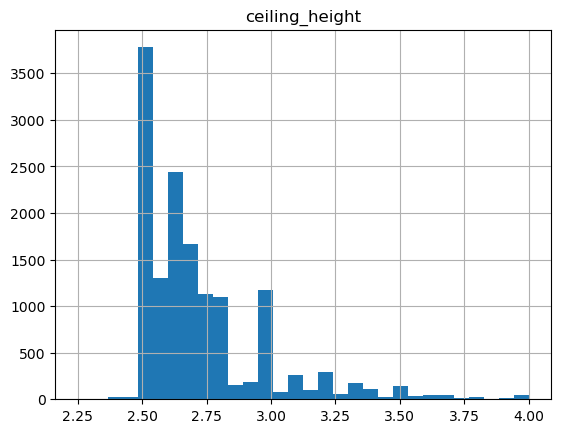

In [6]:
data.hist('ceiling_height', bins = 30, range = (2.25, 4.0))

Посмотрим теперь, насколько сильно отличаются медианные значения от среднего:

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Отличия в пределах около 10%, но есть выбросы, с которыми мы будем разбираться на следующем шаге. Заполним пропуски в столбце `ceiling_height` медианным значением:

In [8]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Столбцы `kitchen_area` и `living_area` могут кореллировать с общей площадью. Для начала взглянем на коэффициент Пирсона:

In [9]:
print(
    'Kitchen: ', data['kitchen_area'].corr(data['total_area']), '\n'
    'Living:', data['living_area'].corr(data['total_area'])
)

Kitchen:  0.6091211711198314 
Living: 0.9395373338721491


Оба коэффициента положительные, следовательно, корреляция есть.  
Вычислим теперь коэффициенты, связывающие искомые значения с общей площадью. 

In [10]:
# Кухня
total_to_kitchen_ratio = (data['total_area'] / data['kitchen_area']).median()
total_to_kitchen_ratio

5.8

In [11]:
# Жилая площадь
total_to_living_ratio = (data['total_area'] / data['living_area']).median()
total_to_living_ratio

1.7609977447984868

Теперь с помощью найденных коэффициентов заполним пропуски:

In [12]:
data['kitchen_area'].fillna(data['total_area'] / total_to_kitchen_ratio, inplace=True)
data['living_area'].fillna(data['living_area'] / total_to_living_ratio, inplace=True)

Так как пропуски названия населённого пункта `locality_name` и количества этажей в здании `floors_total` не получится заполнить достоверными данными, исключим эти наблюдения из датасета, так как их процент совсем невелик. Дополнительно приведём столбец `floors_total` к типу `int`

In [13]:
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)
data['floors_total'] = data['floors_total'].astype(int)

Учитывая соотношение количества квартир к аппартаментам, можем предположить, что пропущенные значения означают, что клиенты не заполняли данный пункт. Вероятнее всего, пропуски означают «не аппартаменты».  

Заполним пропущенные ячейки значением `False`

In [14]:
data['is_apartment'].fillna(False, inplace=True)

Вероятнее всего, в столбце `balcony` пропущенные значаения означают отстутствие балкона и появились они из-за того, что пользователи оставили этот пункт незаполненным. Заполним пропуски нулями, а тип столбца приведём к `int`:

In [15]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

Аналогично будет рассуждать с парками и водоёмами в радиусе 3 км. Заполним пропуски в столбцах  `parks_around3000` и `ponds_around3000` нулями и приведём значения к типу `int`:

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

Так как достоверно заполнить пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` не получится, заменим их на нетипичные значения `(-1)` и будем учитывать это в дальнейшем.

In [17]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

Аналогично поступим и с количеством дней размещения объявления `days_exposition`:

In [18]:
data['days_exposition'] = data['days_exposition'].fillna(-1).astype(int)

Приведём тип данных в столбце `first_day_exposition` к `datetime64`

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, везде ли заполнены пропуски и приведены ли типы в соответствие.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony              

### Поиск и обрботка неявных дубликатов
Проверим столбец с названием населённых пунктов на уникальность

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Ячейки в которых, например, посЕлок и посЁлок написаны по-разному или вообще не указан вид населённого пункта, считаются разными. Попробуем в ячейках оставить только названия. Так как все они начинаются с заглавных букв, удалим все слова, которые начинаются со строчных:

In [22]:
data['locality_short'] = data['locality_name'].apply(lambda x:' '.join([word for word in x.split() if not word[0].islower()])).str.strip()
data['locality_short'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Поиск редких и выбивающихся значений



Проверим столбец с высотой потолков в датасете, похоже там есть выбросы и неправильно введённые значения.

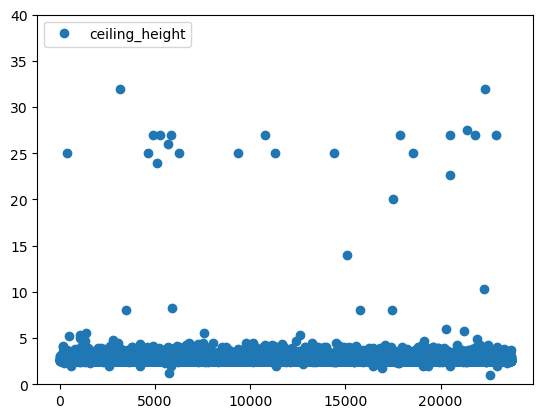

In [23]:
data.plot(y='ceiling_height', style='o', ylim=(0, 40));

По графику видно, что есть значения, которые примерно в 10 раз больше нормы. Видимо, их заполнили некорректно. Оставим неизменными значения в пределах от 1.9 и 6 м. Значения от 20 до 40 разделим на 10, а все остальные выбросы удалим из датасета.

In [24]:
data = data.drop(data[(data['ceiling_height'] < 1.9)].index)
data = data.drop(data[(data['ceiling_height'] > 6) & (data['ceiling_height'] < 18)].index)
data = data.drop(data[data['ceiling_height'] > 40].index)
data.loc[data['ceiling_height'] > 19, 'ceiling_height'] /= 10

Проверим, что получилось. 

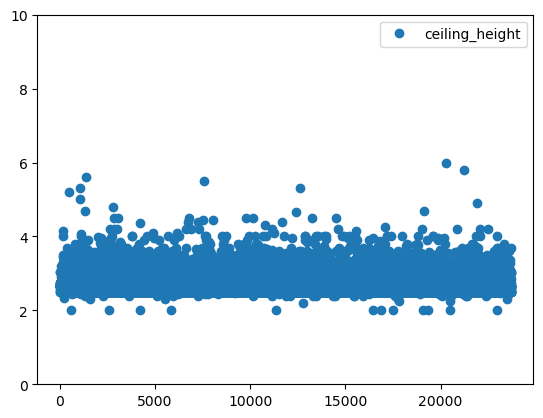

In [25]:
data.plot(y='ceiling_height', style='o', ylim=(0, 10));

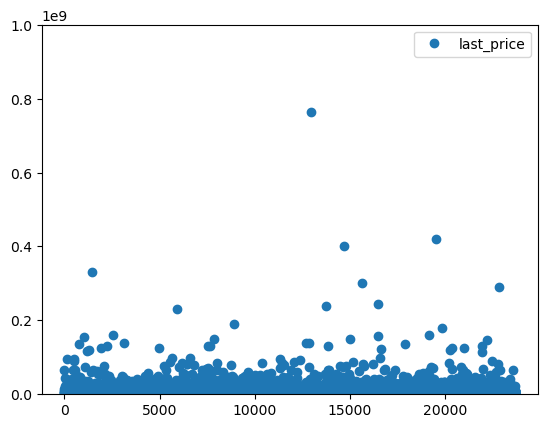

In [26]:
data.plot(y='last_price', style='o', ylim=(0, 1000000000));

Посмотрим ещё раз на датасет, чтобы увидеть, в каких столбцах ещё могут быть выбивающиеся значения.

In [27]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23555.000000,2.355500e+04,23555.000000,23555,23555.000000,23555.000000,23555.000000,21690.000000,23555.000000,23555.000000,23555.000000,23555.00000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000,23555.000000
mean,9.878285,6.540479e+06,60.328896,2017-11-10 09:12:09.475695360,2.070855,2.696897,10.674973,34.459467,5.878200,10.486564,0.593547,22046.88321,10878.891530,0.468775,166.510422,0.589684,198.143834,156.271917
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,-1.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,10143.00000,2185.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000
50%,9.000000,4.644000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,21854.00000,11246.000000,0.000000,-1.000000,0.000000,-1.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,34324.00000,15239.500000,1.000000,301.000000,1.000000,389.000000,198.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.00000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.679998,1.091299e+07,35.662553,NaN,1.078689,0.221463,6.593124,22.048564,4.871515,6.028131,0.960337,16463.71515,9640.224551,0.748375,306.687091,0.883733,305.628377,213.631598


Проанализируем столбец со стоимостью:

count    23555.000000
mean         6.540479
std         10.912988
min          0.012190
25%          3.400000
50%          4.644000
75%          6.790000
max        763.000000
Name: last_price_in_mln, dtype: float64

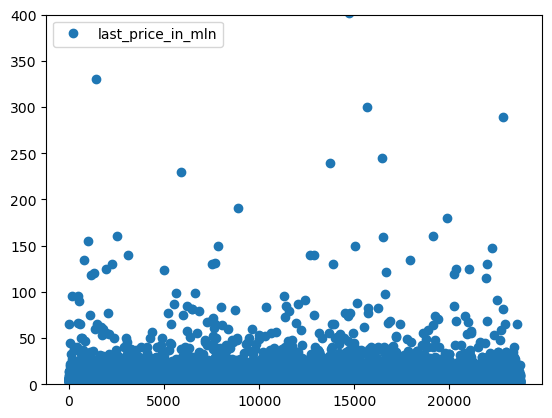

In [28]:
# Перевод стоиомсти в миллионы
data['last_price_in_mln'] = data['last_price'] / 1e6

# Визуализация
data.plot(y='last_price_in_mln', style='o', ylim=(0, 400))
data['last_price_in_mln'].describe()

Видно, что в датасете есть значения меньше 1 млн и больше 100 млн. Даже если эти данные верны, они сильно искажают весь датасет и отклоняют средние значения. Уберём из данных все строки, стоимость объектов в которых больше 100 млн и меньше 500 тыс.

In [29]:
data = data.drop(data[((data['last_price_in_mln'] < 0.5) | (data['last_price_in_mln'] > 100))].index)
data['last_price_in_mln'].describe()

count    23504.000000
mean         6.252127
std          6.431964
min          0.500000
25%          3.400000
50%          4.628270
75%          6.750000
max         99.000000
Name: last_price_in_mln, dtype: float64

Распределение стало более равномерным и понятным. Во всех остальных столбцах подозрительных отклонений не замечено, 
кроме тех, которые мы умышленно заполнили через `-1`

### Расчёт и заполнения новых столбцов

#### Цена квадратного метра

In [30]:
data['sqm_price'] = (data['last_price'] / data['total_area']).astype(int)

#### День публикации объявления

In [31]:
data['exposition_dayofweek'] = data['first_day_exposition'].dt.dayofweek

#### Месяц публикации объявления

In [32]:
data['exposition_month'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [33]:
data['exposition_year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [34]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'другой'

#### Расстояние до центра города

In [35]:
data['km_from_center'] = (data['cityCenters_nearest']/1000).astype(int)

## Исследовательский анализ данных

### Изучение параметров обектов
#### Общая площадь

count    23504.000000
mean        59.915102
std         33.471016
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        590.000000
Name: total_area, dtype: float64

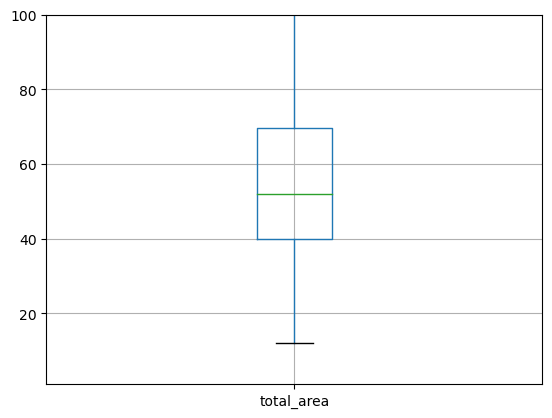

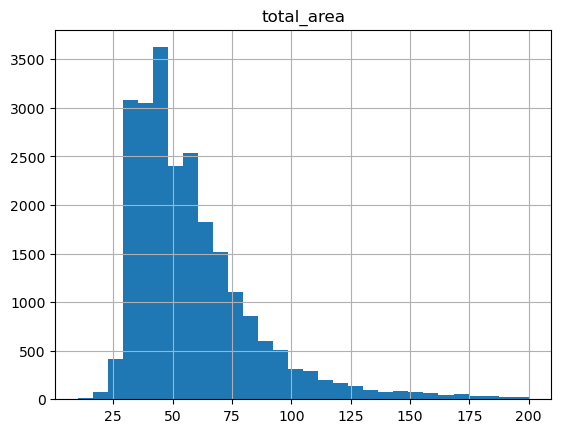

In [36]:
data.boxplot('total_area')
plt.ylim(1, 100)
data.hist('total_area', bins=30, range=(10,200))

data['total_area'].describe()

Чаще всего недвижимость продают с общей площадью приблизительно от 40 до 70 кв.м. Наиболее часто встречаются лоты примерно в 50 кв.м.

#### Жилая площадь

count    21649.000000
mean        34.256705
std         21.192609
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

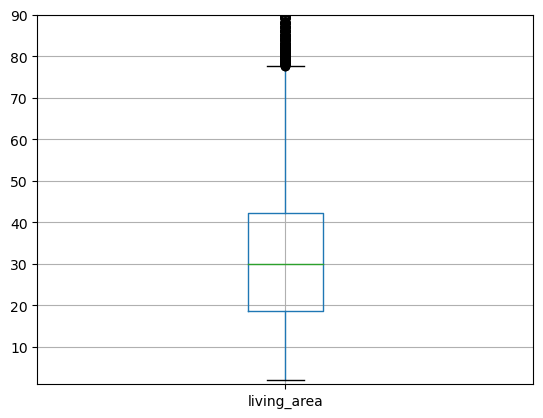

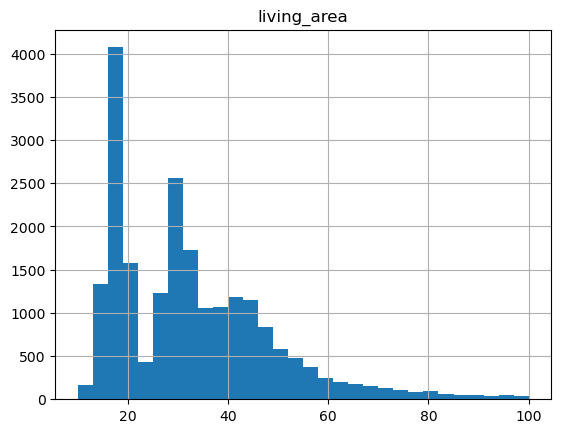

In [37]:
data.boxplot('living_area')
plt.ylim(1, 90)
data.hist('living_area', bins=30, range=(10,100))

data['living_area'].describe()

Видны заметные выбросы в районе 15 и 30 кв.м. Возможно, это связано с типовыми планировками.

#### Площадь кухни

count    23504.000000
mean        10.436198
std          5.828449
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

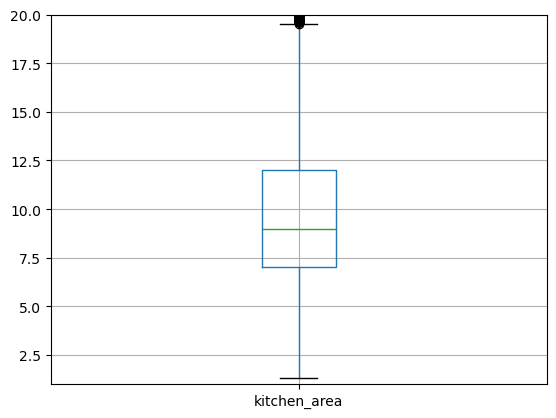

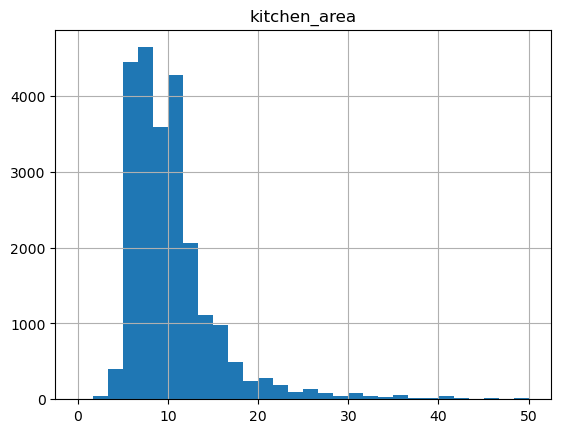

In [38]:
data.boxplot('kitchen_area')
plt.ylim(1, 20)
data.hist('kitchen_area', bins=30, range=(0,50))

data['kitchen_area'].describe()

Наиболее распространённая площадь кухни приблизительно 9 квадратных метров.

#### Цена объекта

count    23504.000000
mean         6.252127
std          6.431964
min          0.500000
25%          3.400000
50%          4.628270
75%          6.750000
max         99.000000
Name: last_price_in_mln, dtype: float64

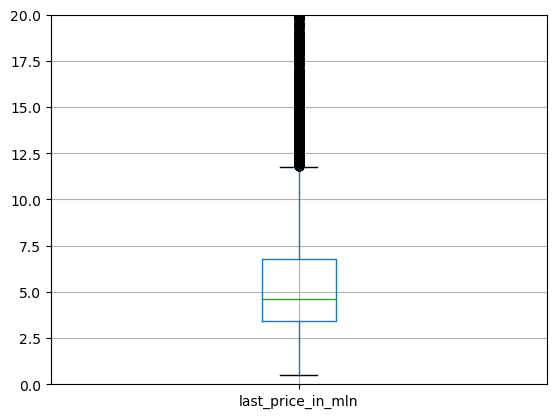

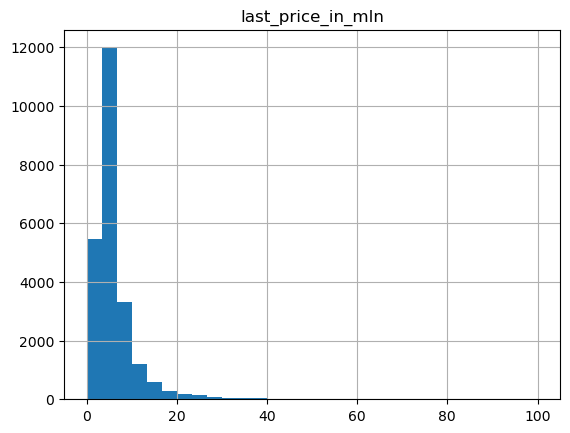

In [39]:
data.boxplot('last_price_in_mln')
plt.ylim(0, 20)
data.hist('last_price_in_mln', bins=30, range=(0, 100))


data['last_price_in_mln'].describe()

Основная масса продаваемой недвижимости находится в районе 3,4-6,8 млн. Наиболее распространённые лоты стоят около 4,6 млн.

#### Высота потолков

count    23504.000000
mean         2.695863
std          0.217817
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

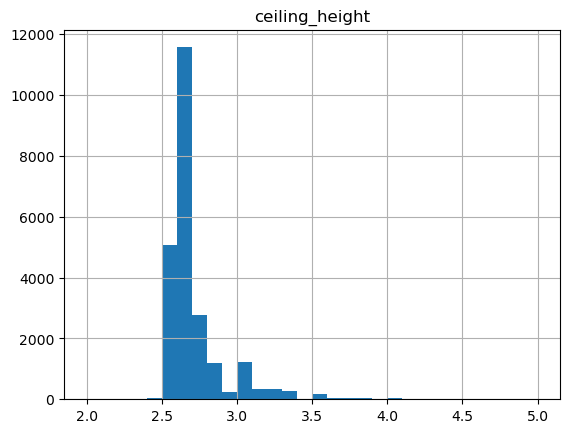

In [40]:
data.hist('ceiling_height', bins=30, range=(2, 5))
data['ceiling_height'].describe()

Больше всего объектов с высотой потолков около 2,7 м.

#### Этаж квартиры

count    23504.000000
mean         5.879978
std          4.871966
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

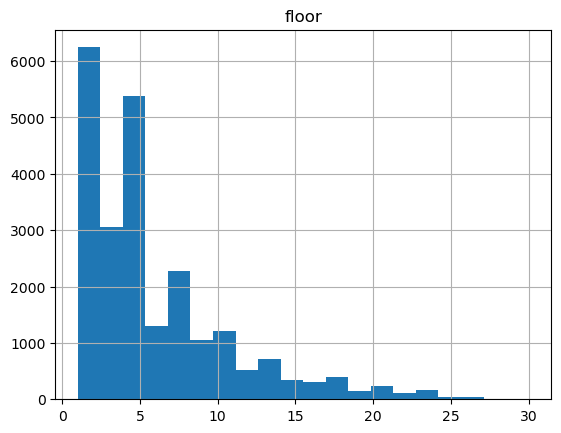

In [41]:
data.hist('floor', bins=20, range=(1,30))
data['floor'].describe()

Больше всего объектов продаётся на 2-м и 4-м этажах.

#### Тип этажа квартиры

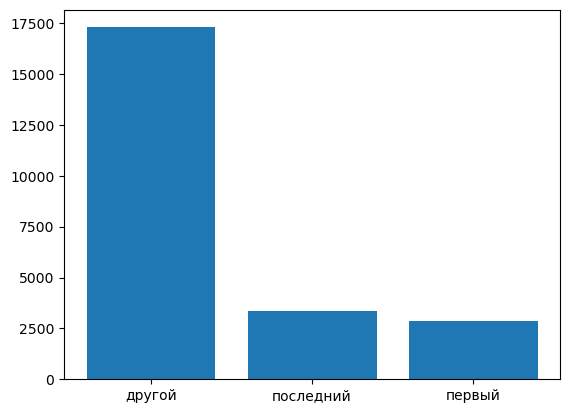

In [42]:
type_floor_grouped = data['floor_type'].value_counts()
plt.bar(type_floor_grouped.index, type_floor_grouped.values);

Количество объектов в датасете, которые располагаются на первом и последнем этаже, близко друг к другу. При этом, квартир, расположенных на первом этаже, меньше, чем тех, что находятся на втором.

#### Общее количество этажей в доме

count    23504.000000
mean        10.684352
std          6.594165
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

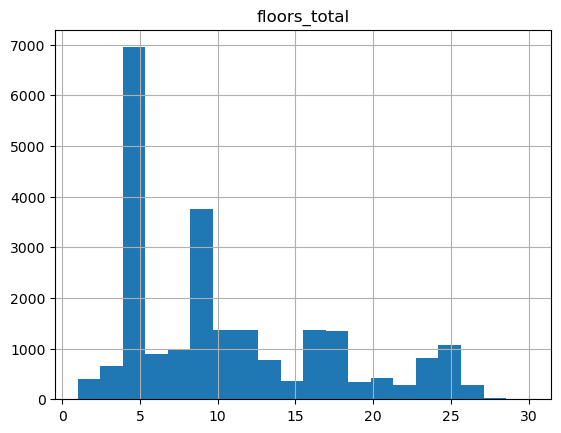

In [43]:
data.hist('floors_total', bins=20, range=(1,30))
data['floors_total'].describe()

Больше всего объектов в 4-х и 9-этажных домах.

#### Расстояние до центра города в метрах
Отфильтруем значения, которые мы заполняли с помощью `-1`, и произведём всё те же действия

count    18019.000000
mean     14212.550585
std       8611.066253
min        181.000000
25%       9272.500000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

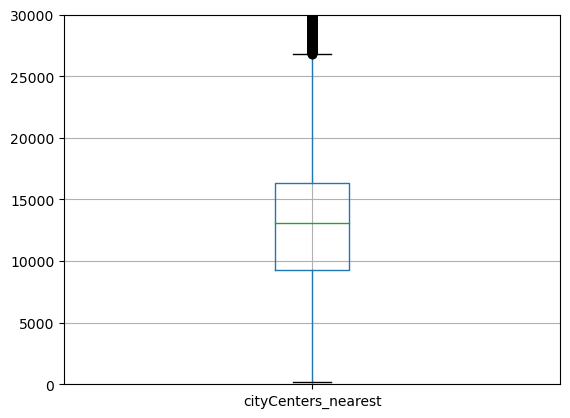

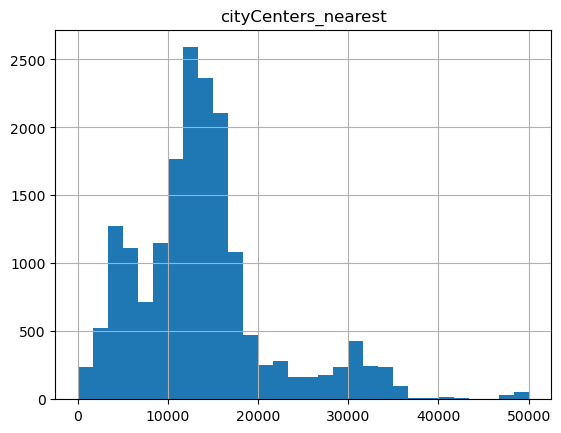

In [44]:
filtered_by_city_center = data[data['cityCenters_nearest'] != -1]

filtered_by_city_center.boxplot('cityCenters_nearest')
plt.ylim(0, 30000)
filtered_by_city_center.hist('cityCenters_nearest', bins=30, range=(0,5e4))

filtered_by_city_center['cityCenters_nearest'].describe()

Основная масса объектов находится в пределах 9-16 км от центра.

#### Расстояние до ближайшего аэропорта

Здесь поступим аналогичным образом, отфильтруем данные и построим графики.

count    17996.000000
mean     28802.643643
std      12644.780944
min          0.000000
25%      18551.000000
50%      26764.500000
75%      37298.000000
max      84869.000000
Name: airports_nearest, dtype: float64

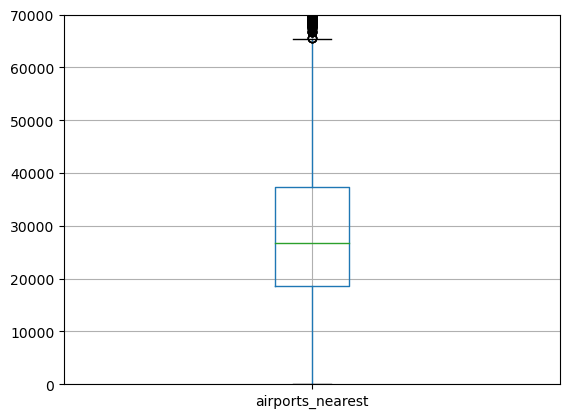

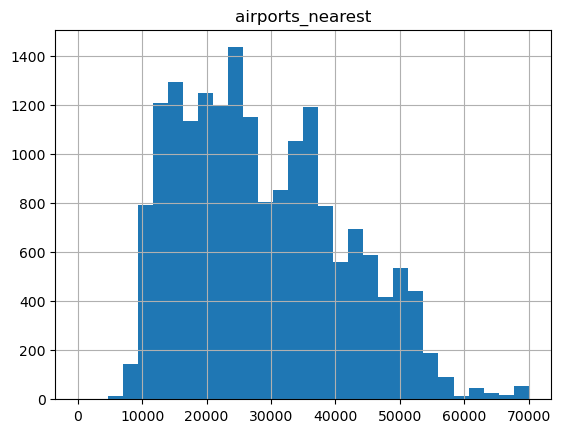

In [45]:
filtered_by_airports = data[data['airports_nearest'] != -1]
filtered_by_airports.boxplot('airports_nearest')
plt.ylim(0, 70000)

filtered_by_airports.hist('airports_nearest', bins=30, range=(0,7e4))
filtered_by_airports['airports_nearest'].describe()

15 и 25 километров от аэропорта — самые распространённые показатели.

#### Расстояние до ближайшего парка

count    7999.000000
mean      490.899862
std       341.980787
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

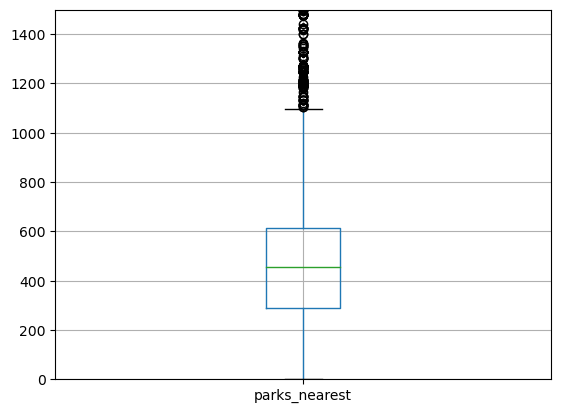

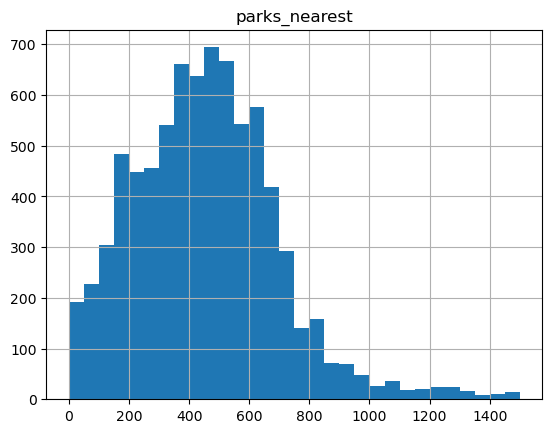

In [46]:
filtered_by_parks = data[data['parks_nearest'] != -1]
filtered_by_parks.boxplot('parks_nearest')
plt.ylim(0, 1500)

filtered_by_parks.hist('parks_nearest', bins=30, range=(0,1500))
filtered_by_parks['parks_nearest'].describe()

Очень распространены объекты, в которых расстояние до парка менее 1 км.

#### День и месяц публикации объявления

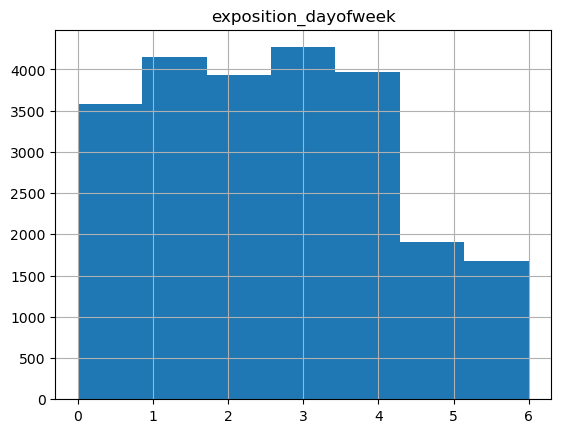

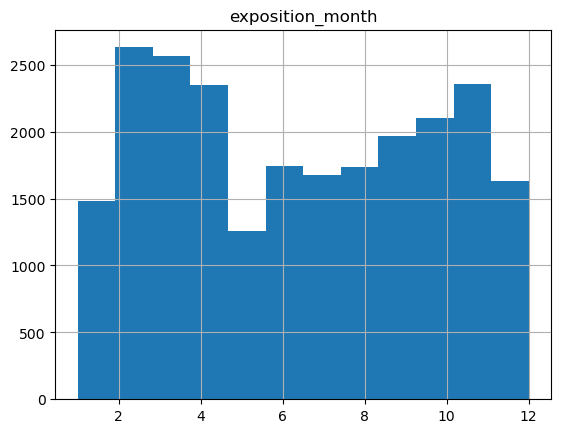

In [47]:
data.hist('exposition_dayofweek', bins=7)
data.hist('exposition_month', bins=12, range = (1, 12));

* Чаще всего объявления публикуются во вторник и четверг. В выходные количество снижается примерно в 2 раза.
* Самые распространённые месяцы — февраль и март. В мае же виден заметный спад.

### Скорость продажи квартир
Необходимо определить как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление. 
Для начала построим гистограмму:

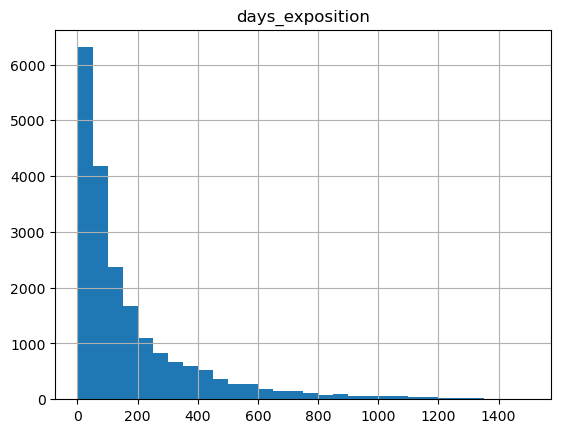

In [48]:
data.hist('days_exposition', bins=30, range=(1,1500));

Видно, что основной поток приходится на промежуток до 200 дней. Укрупним этот участок, изменив масштаб и увеличив количество корзин.

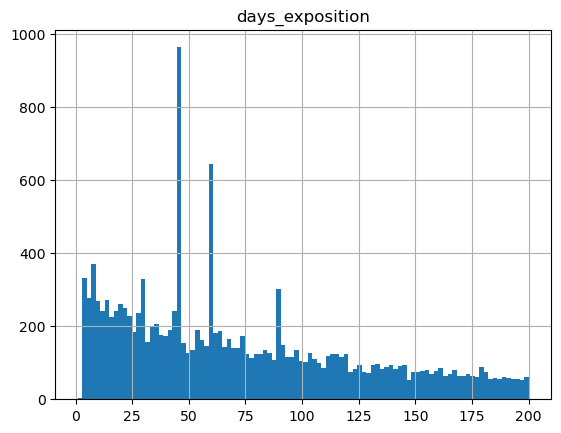

In [49]:
data.hist('days_exposition', bins=100, range=(1,200));

Видны два заметных пика для показателей в 45 и 60 дней. 
Теперь с помощью метода `describe()` ещё раз взглянем на данные, определим среднее и медиану.

In [50]:
data['days_exposition'].describe()

count    23504.000000
mean       156.071945
std        213.470252
min         -1.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение в выборке — 156 дней, а медианное — 73.  
Построим диаграмму размаха, чтобы нагляднее увидеть, что можно считать нормальным временем продажи, а что чересчур долгим.

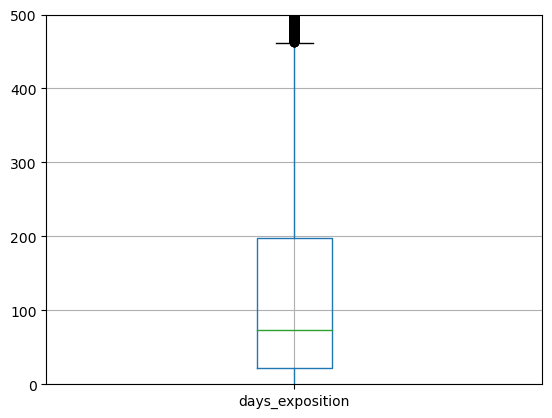

In [51]:
data.boxplot('days_exposition')
plt.ylim(0, 500);

Получается, что нормальным временем экспозиции является промежуток от 20 до 200 дней. При этом, чаще всего объявление снимается через 70 дней.

Отифильтруем значения и ещё раз проанализируем столбец `days_exposition`

In [52]:
filtered_by_exposition = data[data['days_exposition'] != -1]
filtered_by_exposition['days_exposition'].describe()

count    20339.000000
mean       180.514283
std        219.600161
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

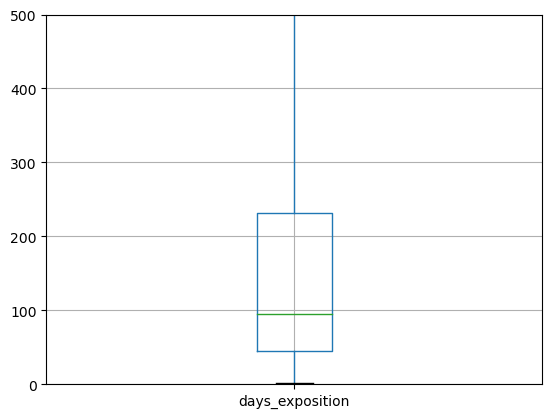

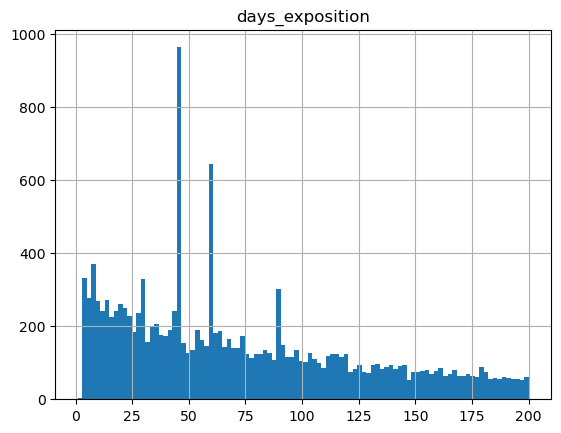

In [53]:
filtered_by_exposition.boxplot('days_exposition')
plt.ylim(0, 500)

filtered_by_exposition.hist('days_exposition', bins=100, range=(1,200));

45  дней — очень распространённый показатель. Возможно, это как-то связано с правилами площадки. Например, через полтора месяца объявление снимается автоматически. При этом, медианное значение — 95 дней.

### Факторы, влияющие на стоимость
#### Общая площадь
Построим диаграмму рассеивания:

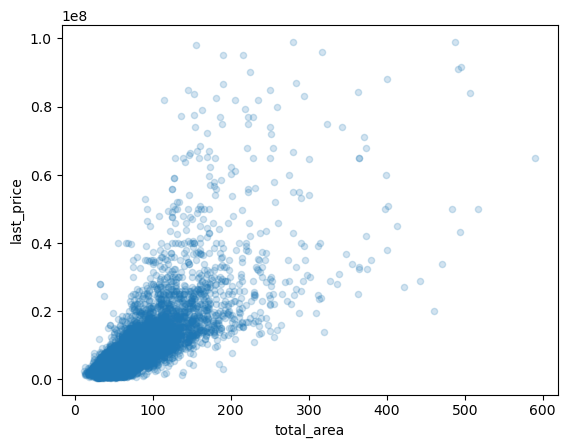

In [54]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2);

Дополнительно посчитаем коэффициент Пирсона, чтобы удостовериться в том, что эти факторы значительно зависят друг от друга:

In [55]:
data['last_price'].corr(data['total_area'])

0.7689633628160082

Коэффициент положительный и на диаграмме рассеивания видно, что есть заметная корелляция стоимости объекта от его площади.

#### Жилая площадь
Аналогично построим диаграмму рассеивания и посчитаем коэффициент Пирсона:

0.683397591585873

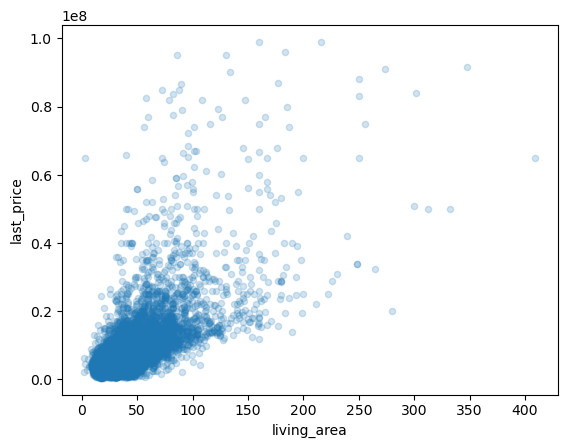

In [56]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)
data['last_price'].corr(data['living_area'])

Видно, что зависимость уже чуть ниже, чем в предыдущем случае, но она всё ещё значительная.

#### Площадь кухни

0.6143506500208719

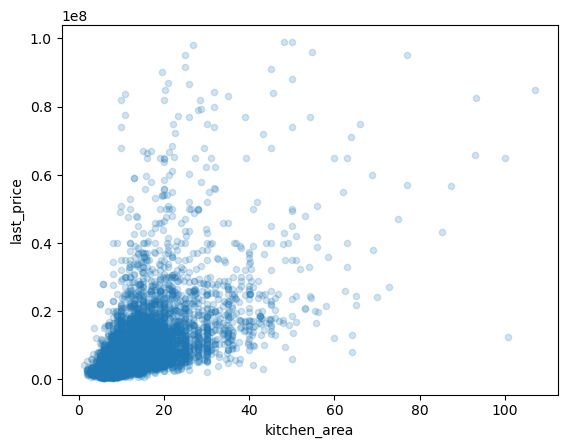

In [57]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)
data['last_price'].corr(data['kitchen_area'])

Зависимость стоимости от площади кухни ещё ниже.

#### Количество комнат
С помощью сводной таблицы найдём медианную цену для объектов с разным количеством комнат:

In [58]:
price_by_rooms = data.pivot_table(index='rooms', values='last_price_in_mln', aggfunc='median')
price_by_rooms.head()

,last_price_in_mln
rooms,
0,2.7000
1,3.6000
2,4.7695
3,6.2000
4,9.0000


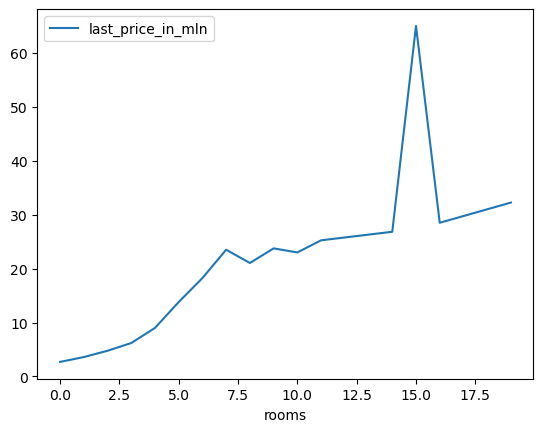

In [59]:
price_by_rooms.plot();

#### Этаж, на котором расположена квартира

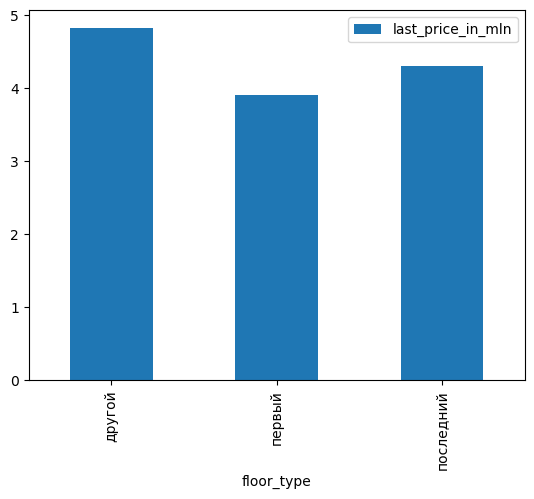

In [60]:
price_by_floors = data.pivot_table(index='floor_type', values='last_price_in_mln', aggfunc='median')
price_by_floors.plot(kind='bar');

Квартиры на первых и последних этажах оказались в среднем дешевле, чем на любых других. Важно отметить, что самыми дешёвыми объектами являются те, что находятся на первом этаже.

#### Дата размещения (день недели, месяц, год)
* **День недели**

,last_price_in_mln
count,7.000000
mean,4.620000
std,0.071647
min,4.540000
25%,4.550000
50%,4.650000
75%,4.675000
max,4.700000


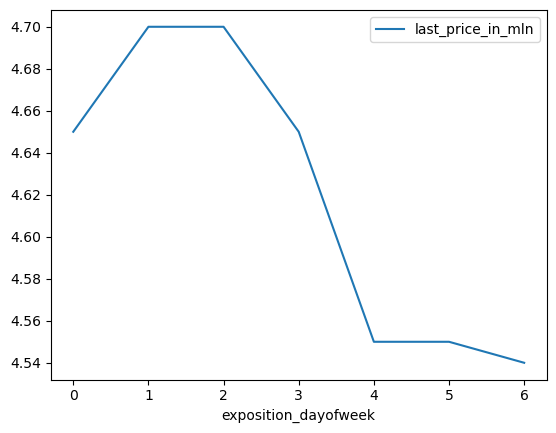

In [61]:
price_by_day = data.pivot_table(index='exposition_dayofweek', values='last_price_in_mln', aggfunc='median')
price_by_day.plot()
price_by_day.describe()

Несмотря на то, что стандартное отклонение невелико, всё же можно наблюдать тренд на увеличение стоимости ко вторнику и среде и уменьшению в выходные.

* **Месяц**

,last_price_in_mln
count,12.000000
mean,4.620833
std,0.106383
min,4.400000
25%,4.557500
50%,4.650000
75%,4.692500
max,4.800000


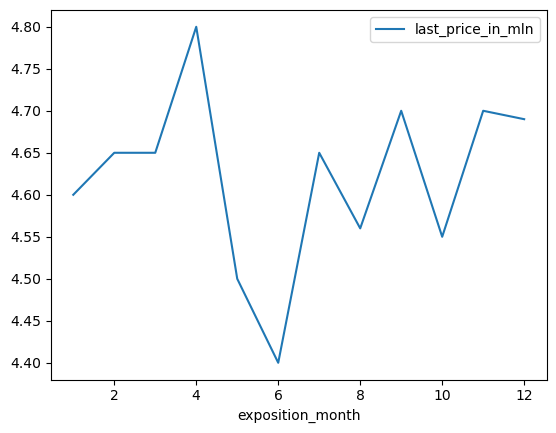

In [62]:
price_by_month = data.pivot_table(index='exposition_month', values='last_price_in_mln', aggfunc='median')
price_by_month.plot()
price_by_month.describe()

А вот из данных по месяцам можно сделать вывод о сезонности цены. Пик стоимости в апреле, а самая низкая цена в июне.

* **Год**

,last_price_in_mln
count,6.000000
mean,5.256667
std,1.214029
min,4.500000
25%,4.512500
50%,4.800000
75%,5.237500
max,7.640000


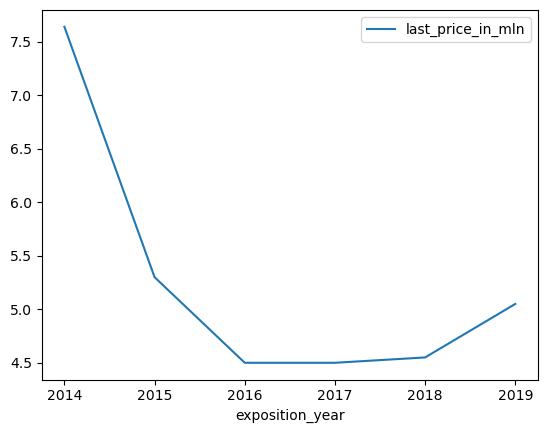

In [63]:
price_by_year = data.pivot_table(index='exposition_year', values='last_price_in_mln', aggfunc='median')
price_by_year.plot()
price_by_year.describe()

По годам уже можно наблюдать заметную тенденцию к падению рынка в период с 2014 по 2016 год, и потом начало роста.

### Средняя стоимость кв.м.
Необходимо посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Для начала посмотрим, что это за населённые пункты.

In [64]:
ten_main_localities = data['locality_short'].value_counts().head(10)
ten_main_localities

locality_short
Санкт-Петербург    15606
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: count, dtype: int64

Пройдёмся по каждому населённому пункту, соберём значения стоимости квадратного метра и найдём среднее.

In [65]:
sqm_price_avg_by_locality = pd.Series(dtype='float64')
for locality in ten_main_localities.index:
    filtered_data = data.loc[data['locality_short'] == locality]
    mean_sqm_price = filtered_data['sqm_price'].mean()
    sqm_price_avg_by_locality[locality] = mean_sqm_price

Санкт-Петербург    113589.718634
Мурино              86040.658703
Кудрово             95260.393617
Шушары              78550.883827
Всеволожск          68654.007538
Пушкин             103125.373984
Колпино             75424.150888
Парголово           90175.489297
Гатчина             68745.693811
Выборг              58141.489451
dtype: float64

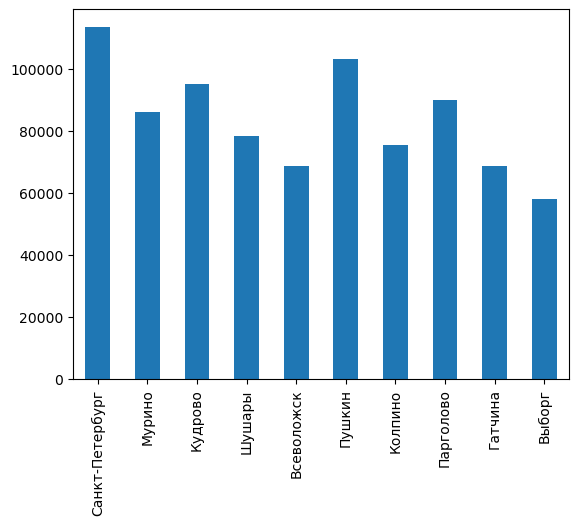

In [66]:
sqm_price_avg_by_locality.plot(kind='bar')
sqm_price_avg_by_locality

Отсортируем значения для наглядности и вновь выведем их на экран:

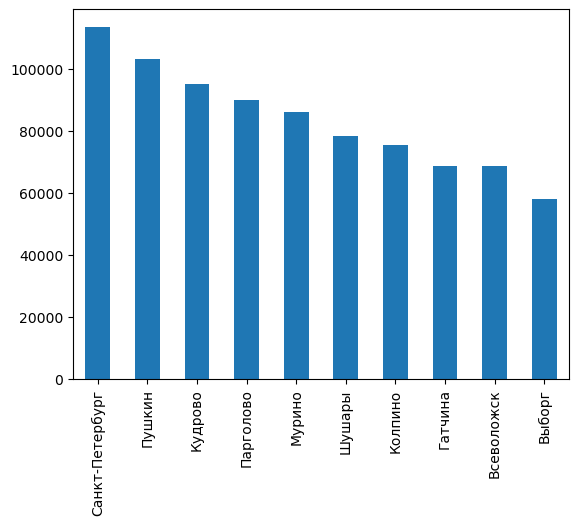

In [67]:
sqm_price_avg_by_locality = sqm_price_avg_by_locality.sort_values(ascending=False)
sqm_price_avg_by_locality.plot(kind='bar');

Видно, что у нас два лидера по стоимости квадратного метра — это Санкт-Петербург и Пушкин.

### Зависиомсть стоимости объектов от расстояния до центра города.
Необходимо найти кваритры, находящиеся в СПб и с помощью столбца `locality_short`, и вычислить среднюю цену для каждого километра.

,sqm_price
km_from_center,
0,167382.895105
1,147468.723404
2,139629.778878
3,123628.092308
4,135947.140468


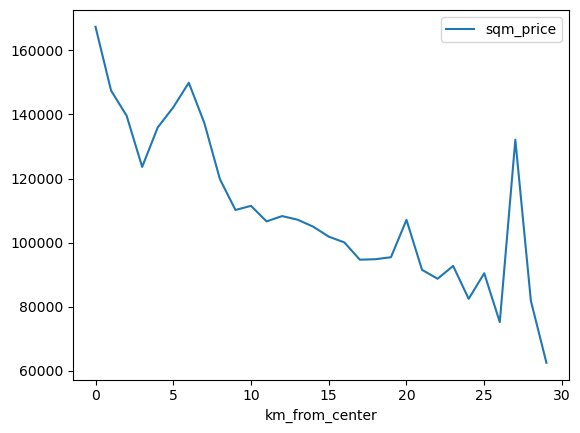

In [68]:
spb_df = data.loc[data['locality_short'] == 'Санкт-Петербург']
sqm_price_avg_by_km_from_center = spb_df.pivot_table(index='km_from_center', values = 'sqm_price', aggfunc='mean')

sqm_price_avg_by_km_from_center.plot()
sqm_price_avg_by_km_from_center.head()

Несмотря на всплески, в целом тенденция линейная: чем дальше от центра, тем ниже стоимость квадратного метра. Возможно, всплески обусловлены элитными районами на расстоянии 6-7, 20 и 27 км от центра.

In [69]:
spb_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_short,last_price_in_mln,sqm_price,exposition_dayofweek,exposition_month,exposition_year,floor_type,km_from_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,-1,Санкт-Петербург,13.000,120370,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,Санкт-Петербург,5.196,92785,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424,Санкт-Петербург,64.900,408176,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,Санкт-Петербург,10.000,100000,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,-1.0,-1,Санкт-Петербург,7.915,110544,3,4,2019,другой,11


,last_price_in_mln
km_from_center,
0,17.618739
1,15.044579
2,13.701331
3,11.189006
4,12.767270


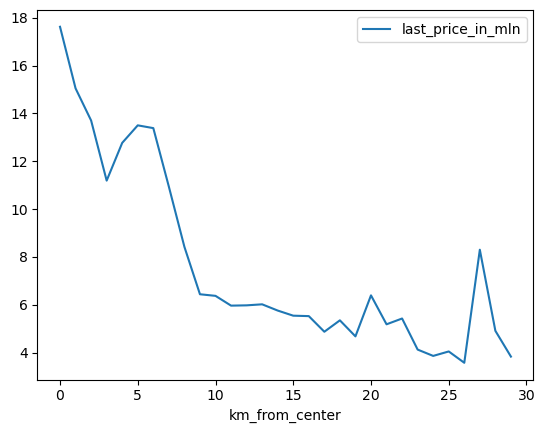

In [70]:
spb_df = data.loc[data['locality_short'] == 'Санкт-Петербург']
sqm_price_avg_by_km_from_center = spb_df.pivot_table(index='km_from_center', values = 'last_price_in_mln', aggfunc='mean')

sqm_price_avg_by_km_from_center.plot()
sqm_price_avg_by_km_from_center.head()

В целом, зависимость близка к линейной. Но есть некоторые выбивающиеся значения. Посмотрим на них поближе.

In [71]:
sqm_price_avg_by_km_from_center.sort_values(by='last_price_in_mln', ascending=False).head(10)

,last_price_in_mln
km_from_center,
0,17.618739
1,15.044579
2,13.701331
5,13.499091
6,13.383040
4,12.767270
3,11.189006
7,10.935914
8,8.420942


В основмном, чем ближе к центру, тем дороже стоимость объектов. Но эта закономерность нарушается на расстоянии 5-6 и 27 км от центра. Возможно, это связано с тем, что в первом случае речь идёт об исторической застройке, а во втором о каких-то элитных районах.

---

## Выводы


### Площадь жилья, этажность и стоимость
* Самыми распространёнными предложениями на рынке являются объкты площадью около 50 кв.м. и стоимостью около 4-5 млн.
* Чаще всего встречаются предложения в 4-х и 9-этажных домах.

*Для покупателей это означает большую свободу выбора, а продавцам в данной категории может быть сложнее найти покупателя из-за возможной перенасыщенности рынка.*


###  Первые и последние этажи
* Квартиры на первых и последних этажах в среднем дешевле.

*Таким образом, покупатель может договориться о скидке, если лот имеет стоимость равную стоимости жилья на других этажах в том же самом доме. А продавцам необходимо сразу понимать, что стоимость таких объектов будет ниже.*

### Сезонность и годовые изменения
* В течение года есть сезонность изменений цены на недвижимость.
* Дороже всего квартиры продаются в апреле, а дешевле всего в июне.
* С 2014 по 2016 год наблюдалось заметное падение стоимости недвижимости, а с 2016 вновь начался рост.

*Если рассматривать объект в качестве инвестиции, то покупать его выгоднее в начале лета, а продавать весной. Так как есть устойчивый тренд, то через несколько лет стоимость объекта может значительно вырасти.*

### География
* Самая высокая стоимость объектов недвижимости наблюдается в Санкт-Петербурге и Пушкине.
* В Санкт-Петербурге стоимость недвижимости почти напрямую зависит от расстояния до центра города. Чем ближе к центру, тем дороже.
* Есть и исключения, например, недвижимость на расстоянии 3-5 км от центра ниже, чем на расстоянии 5-7.

*Для тех, кто хочет жить в самом центре СПб, но не хочет переплачивать, нужно искать недвижимость на расстоянии 3-5 км.*

### Время экспозиции объявления
* Очень часто объявления о продаже снимаются через 45 дней. Возможно, это связано с работой сайта.
* Среднее значение экспозиции — около 70-ти дней.

*Для продавцов это означает, что после полутора месяцев публикации не стоит снимать объявление с продажи. Нормальный срок продажи квартиры может составлять 2 месяца и более, и нужно быть к этому готовым.*